In [1]:
import torch
from torch.nn.functional import one_hot
import matplotlib.pyplot as plt
from torch import Tensor
import numpy as np
import torch.nn as nn
import tqdm
import random

C:\Users\invite\AppData\Local\Microsoft\WindowsApps\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def berthier_data():
    X = torch.Tensor([[0.1, 0.3, 0.1, 0.6, 0.4, 0.6, 0.5, 0.9, 0.4, 0.7],
                      [0.1, 0.4, 0.5, 0.9, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6]]).T
    y = torch.LongTensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
    y = one_hot(y, num_classes=2)
    return X, y


In [3]:
def visualize_samples(data, label):
    # if isinstance(data, Tensor):
    #     data = data.cpu().numpy()
    # if isinstance(label, Tensor):
        # label = label.cpu().numpy()
    data_0 = data[label[:, 0] == 0]
    data_1 = data[label[:, 0] == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

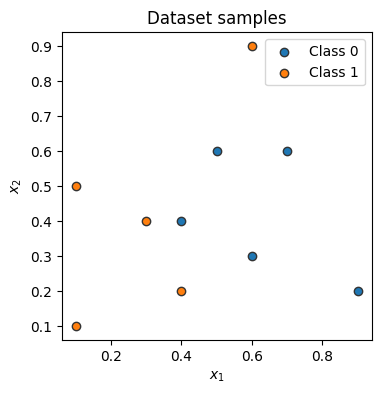

In [4]:
visualize_samples(data=berthier_data()[0], label=berthier_data()[1])
data=berthier_data()[0]

Multilayer pereceptron from scratch without Autograd

In [5]:

class MultiLayerPerceptronFromScratch:
    def __init__(self, lr, num_epochs, x1, x2, x1_label, x2_label, num_inputs = 2, num_outputs =2, batch_size = 10):
        self.lr = lr
        self.num_epochs = num_epochs
        self.x1 = x1
        self.x2 = x2
        self.x1_label = x1_label
        self.x2_label = x2_label
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.batch_size = batch_size
        self.loss = torch.zeros((num_epochs, 1))
        self.loss2 = torch.zeros((num_epochs, 1))
        self.W0 = 0.5 * torch.normal(0, 1, (5, num_inputs))
        self.W1 = 0.5 * torch.normal(0, 1, (5, 5))
        self.W2 = 0.5 * torch.normal(0, 1, (num_inputs, 5))
        self.b0 = 0.5 * torch.normal(0, 1, (5, 1))
        self.b1 = 0.5 * torch.normal(0, 1, (5, 1))
        self.b2 = 0.5 * torch.normal(0, 1, (num_outputs, 1))
        self.temp1 = torch.zeros((batch_size, 1))
        self.x = torch.ones_like(torch.tensor([[self.x1[0], self.x2[0]]])).T
        self.y = torch.ones_like(torch.tensor([[self.x1_label[0], self.x2_label[0]]])).T
        self.x_rand = torch.ones_like(torch.tensor([[self.x1[0], self.x2[0]]])).T
        self.y_rand = torch.ones_like(torch.tensor([[self.x1_label[0], self.x2_label[0]]])).T
        self.a0 = 1. / (1 + torch.exp(-(self.W0 @ self.x + self.b0)))
        self.a0_rand = 1. / (1 + torch.exp(-(self.W0 @ self.x + self.b0)))
        self.a1 = 1. / (1 + torch.exp(-(self.W1 @ self.a0 + self.b1)))
        self.a1_rand = 1. / (1 + torch.exp(-(self.W1 @ self.a0 + self.b1)))
        self.a2 = 1. / (1 + torch.exp(-(self.W2 @ self.a1 + self.b2)))
        self.a2_rand = 1. / (1 + torch.exp(-(self.W2 @ self.a1 + self.b2)))
        

    def forward(self):
        stoch_idx = random.randint(0, self.batch_size - 1)
        for i in range(self.batch_size):
            self.x=torch.tensor([[self.x1[i], self.x2[i]]]).T
            self.y=torch.tensor([[self.x1_label[i], self.x2_label[i]]]).T
            self.a0 = 1. / (1 + torch.exp(-(self.W0 @ self.x + self.b0)))
            self.a1 = 1. / (1 + torch.exp(-(self.W1 @ self.a0 + self.b1)))
            self.a2 = 1. / (1 + torch.exp(-(self.W2 @ self.a1 + self.b2)))
            if i == stoch_idx:
                self.a0_rand = self.a0
                self.a1_rand = self.a1
                self.a2_rand = self.a2
                self.x_rand = self.x
                self.y_rand = self.y
            self.temp1[i] = torch.linalg.norm(self.y - self.a2, 2)
        loss=torch.linalg.norm(self.temp1, 2)**2
        return loss

    def backward(self):
        delta2 = self.a2_rand * (1 - self.a2_rand) * (self.a2_rand - self.y_rand)
        delta1 = self.a1_rand * (1 - self.a1_rand) * (self.W2.T @ delta2)
        delta0 = self.a0_rand * (1 - self.a0_rand) * (self.W1.T @ delta1)
        self.W0 -= self.lr * delta0 @ self.x_rand.T
        self.W1 -= self.lr * delta1 @ self.a0_rand.T
        self.W2 -= self.lr * delta2 @ self.a1_rand.T
        self.b0 -= self.lr * delta0
        self.b1 -= self.lr * delta1
        self.b2 -= self.lr * delta2


    def train(self):
        for k in range(self.num_epochs):
            self.loss2[k]= self.forward()
            self.backward()
        return self.loss2

    def plot(self):
        plt.figure()
        plt.plot(self.loss2)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.show()


    def test(self,X):
        x1,x2=zip(*X)
        len_of_test=len(x1)
        x0=torch.tensor([[x1[0], x2[0]]]).T
        a00 = 1. / (1 + torch.exp(-(self.W0 @ x0 + self.b0)))
        a11 = 1. / (1 + torch.exp(-(self.W1 @ a00 + self.b1)))
        a22 = 1. / (1 + torch.exp(-(self.W2 @ a11 + self.b2)))
        _,size1=a22.size()

        results=torch.zeros((len_of_test,size1))
        # print(results.size())
        # print(results[:,:,0].size())
        for i in range(len_of_test):
            x=torch.tensor([[x1[i], x2[i]]]).T
            a0 = 1. / (1 + torch.exp(-(self.W0 @ x + self.b0)))
            a1 = 1. / (1 + torch.exp(-(self.W1 @ a0 + self.b1)))
            a2 = 1. / (1 + torch.exp(-(self.W2 @ a1 + self.b2)))
            results[i,:]=a2[0]
        # print(type(results[0]))
        return results

In [6]:
x1,x2=zip(*berthier_data()[0])
x1_label,x2_label=zip(*berthier_data()[1])
mlp_from_scratch = MultiLayerPerceptronFromScratch(0.9, 10000, x1, x2, x1_label, x2_label)
cost = mlp_from_scratch.train()



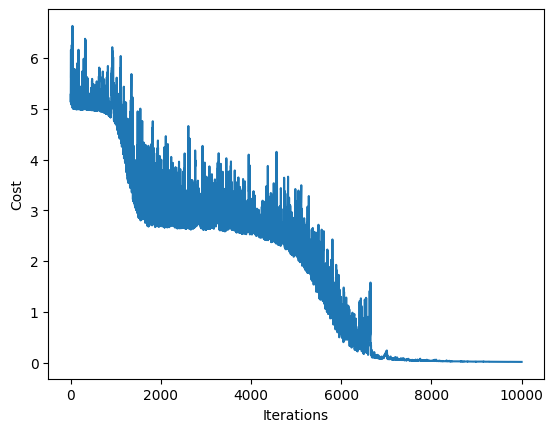

In [7]:
mlp_from_scratch.plot()


C:\Users\invite\AppData\Local\Microsoft\WindowsApps\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


size of b torch.Size([100, 100, 1])
size of c0 torch.Size([4])
size of c1 torch.Size([4])


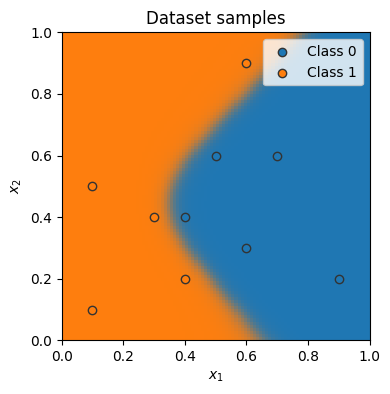

In [8]:

from matplotlib.colors import to_rgba
from torch import Tensor
@torch.no_grad() 
def visualize_classification(model, data, label):
    data_0 = data[label[:, 0] == 0]
    data_1 = data[label[:, 0] == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()
    c0 = Tensor(to_rgba("C0")).to('cpu')
    c1 = Tensor(to_rgba("C1")).to('cpu')
    x1 = torch.arange(0, 1, step=0.01, device='cpu')
    x2 = torch.arange(0, 1, step=0.01, device='cpu')
    xx1, xx2 = torch.meshgrid(x1, x2) 
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    b=torch.stack([model.test(model_inputs[:,0,:]), model.test(model_inputs[:,1,:])])
    for i in range(2,99,2):
            a=torch.stack([model.test(model_inputs[:, i, :]), model.test(model_inputs[:, i+1, :])])
            b=torch.cat([b,a])

    preds=b
    print("size of b",b.size())
    print("size of c0",c0.size())
    print("size of c1",c1.size())
    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = (
        output_image.cpu().numpy()
    )  
    plt.imshow(output_image, origin="lower", extent=(0, 1, 0, 1))
    plt.grid(False)
   

visualize_classification(mlp_from_scratch, berthier_data()[0], berthier_data()[1])
plt.show()

Multilayer pereceptron from scratch with Autograd

In [9]:
class MLP(nn.Module):
    def __init__(self, num_inputs=2, num_outputs=2):
        super().__init__()
        self.linear1 = nn.Linear(num_inputs, 5)
        self.act_fn1 = nn.Sigmoid()
        self.linear2 = nn.Linear(5, 5)
        self.act_fn2 = nn.Sigmoid()
        self.linear3 = nn.Linear(5, num_outputs)
        self.act_fn3 = nn.Sigmoid()
    def forward(self, x):

        x = self.linear1(x)
        x = self.act_fn1(x)
        x = self.linear2(x)
        x = self.act_fn2(x)
        x = self.linear3(x)
        x = self.act_fn3(x)
        return x


In [10]:
from torchsummary import summary

In [11]:
model = MLP()
print("model summary with torch summary")
summary(model, input_size=(2,))
print("model summary with print model\n", model)
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

model summary with torch summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 5]              15
           Sigmoid-2                    [-1, 5]               0
            Linear-3                    [-1, 5]              30
           Sigmoid-4                    [-1, 5]               0
            Linear-5                    [-1, 2]              12
           Sigmoid-6                    [-1, 2]               0
Total params: 57
Trainable params: 57
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
model summary with print model
 MLP(
  (linear1): Linear(in_features=2, out_features=5, bias=True)
  (act_fn1): Sigmoid()
  (linear2): Linear(in_fe

In [12]:
def train_model(model, optimizer, data, loss_module, num_epochs=10000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in (range(num_epochs)):
        data_inputs = data[0]
        data_labels = data[1]
        for i in range(len(data_inputs)):
            # data_inputs = data_inputs.to('cpu') # Only if data was in gpu beforehand 
            # data_labels = data_labels.to('cpu')
            preds = model(data_inputs[i])
            # print(preds)
            loss = loss_module(preds, data_labels[i].float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [13]:
train_model(model=model, optimizer=optimizer, data=berthier_data(), loss_module=loss_module)

In [14]:
from torchviz import make_dot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'


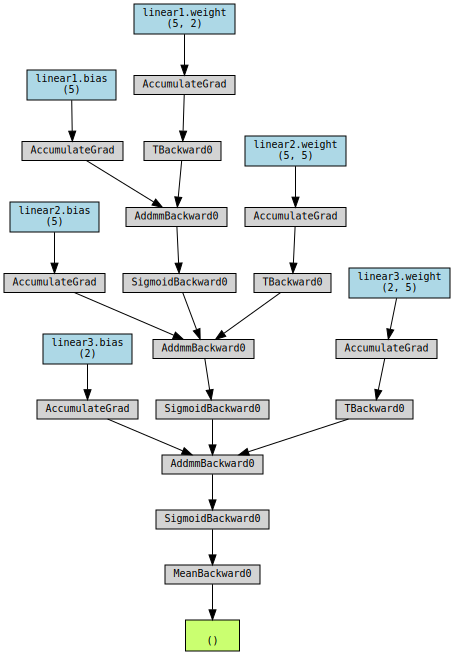

In [15]:
model.eval()
preds = model(berthier_data()[0])
make_dot(preds.mean(), params=dict(model.named_parameters()))

[[9.9976486e-01 2.2677964e-04]
 [9.7082829e-01 2.9110670e-02]
 [9.9986696e-01 1.2843685e-04]
 [9.8207778e-01 1.8281892e-02]
 [9.8011923e-01 1.9599328e-02]
 [5.5165909e-04 9.9945480e-01]
 [1.1194497e-02 9.8893261e-01]
 [1.7322936e-04 9.9983346e-01]
 [3.6513917e-02 9.6347469e-01]
 [5.3197111e-04 9.9947697e-01]]


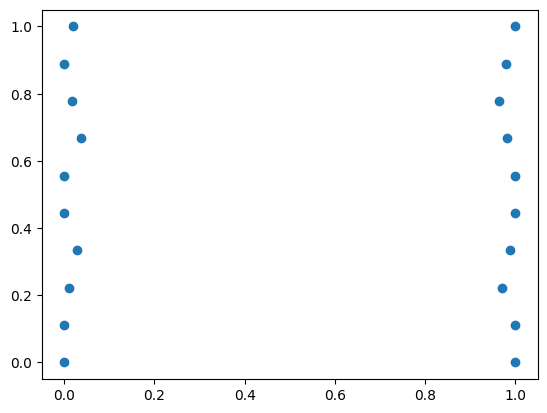

In [16]:
preds = preds.detach().numpy()
print(preds)
plt.scatter(preds, y=[np.linspace(0,1,10),np.linspace(0,1,10)])

In [17]:
model_cl = MLP(num_inputs=2, num_outputs=1)
print("model summary with torch summary")
summary(model_cl, input_size=(2,))
loss_cl = nn.BCELoss()
optimizer_cl = torch.optim.SGD(model_cl.parameters(), lr=0.1)

model summary with torch summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 5]              15
           Sigmoid-2                    [-1, 5]               0
            Linear-3                    [-1, 5]              30
           Sigmoid-4                    [-1, 5]               0
            Linear-5                    [-1, 1]               6
           Sigmoid-6                    [-1, 1]               0
Total params: 51
Trainable params: 51
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [18]:
def train_model2(model, optimizer, data, loss_module, num_epochs=10000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in (range(num_epochs)):
        data_inputs = data[0]
        data_labels = data[1]
        for i in range(len(data_inputs)):
            # data_inputs = data_inputs.to('cpu') #only if data was in gpu beforehand 
            # data_labels = data_labels.to('cpu')
            # print(data_labels[i+6][1])
            preds = model(data_inputs[i]).squeeze()
            loss = loss_module(preds, data_labels[i][0].float())
            optimizer_cl.zero_grad()
            loss.backward()
            optimizer_cl.step()

In [19]:
train_model2(model=model_cl, optimizer=optimizer_cl, data=berthier_data(), loss_module=loss_cl)

tensor([[0.1000, 0.1000],
        [0.3000, 0.4000],
        [0.1000, 0.5000],
        [0.6000, 0.9000],
        [0.4000, 0.2000],
        [0.6000, 0.3000],
        [0.5000, 0.6000],
        [0.9000, 0.2000],
        [0.4000, 0.4000],
        [0.7000, 0.6000]])


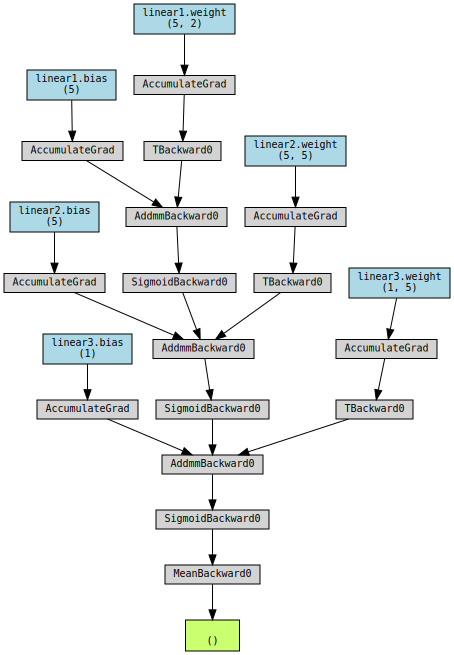

In [20]:
model_cl.eval()
print(berthier_data()[0])
preds_cl = model_cl(berthier_data()[0])
make_dot(preds_cl.mean(), params=dict(model_cl.named_parameters()))

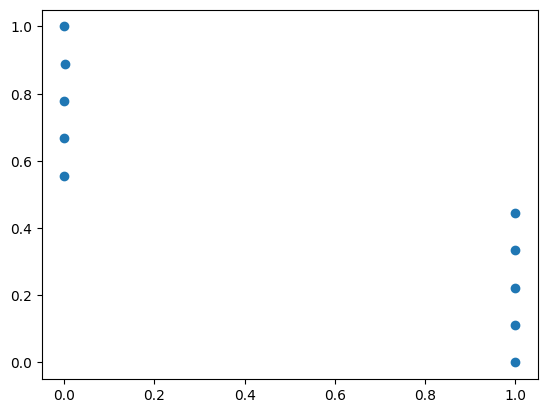

In [21]:
preds_cl = preds_cl.detach().numpy()
plt.scatter(preds_cl,y=np.linspace(0,1,10))

size of b torch.Size([100, 100, 2])
size of preds torch.Size([100, 100, 1])
size of c0 torch.Size([4])
size of c1 torch.Size([4])


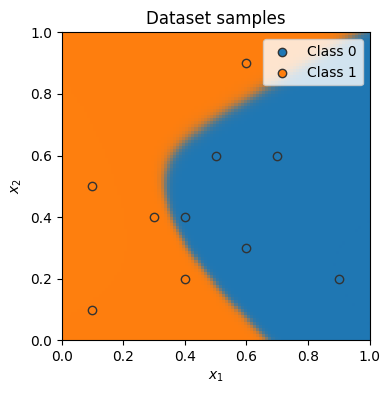

In [22]:
from matplotlib.colors import to_rgba

@torch.no_grad() 
def visualize_classification(model, data, label):
    ## pour gérer si les données etaient sur le gpu
    # if isinstance(data, Tensor):
    #     data = data.cpu().numpy()
    # if isinstance(label, Tensor):
    #     label = label.cpu().numpy()
    data_0 = data[label[:, 0] == 0]
    data_1 = data[label[:, 0] == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to('cpu')
    c0 = Tensor(to_rgba("C0")).to('cpu')
    c1 = Tensor(to_rgba("C1")).to('cpu')
    x1 = torch.arange(0, 1, step=0.01, device='cpu')
    x2 = torch.arange(0, 1, step=0.01, device='cpu')
    xx1, xx2 = torch.meshgrid(x1, x2)  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    b=torch.stack([model_inputs[:, 0, :], model_inputs[:, 1, :]])
    for i in range(2,99,2):
            a=torch.stack([model_inputs[:, i, :], model_inputs[:, i+1, :]])
            b=torch.cat([b,a])
    input=b
    preds = model_cl(input)
    print("size of b",b.size())
    print("size of preds",preds.size())
    print("size of c0",c0.size())
    print("size of c1",c1.size())
    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = (
        output_image.cpu().numpy()
    )  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin="lower", extent=(0, 1, 0, 1))
    plt.grid(False)


visualize_classification(model, berthier_data()[0], berthier_data()[1])
plt.show()

In [31]:
from torchmetrics.classification.roc import ROC  
target = berthier_data()[1]
preds = model(berthier_data()[0])
metric=ROC(thresholds=None)
fpr,tpr,threshholds=metric(preds,target)


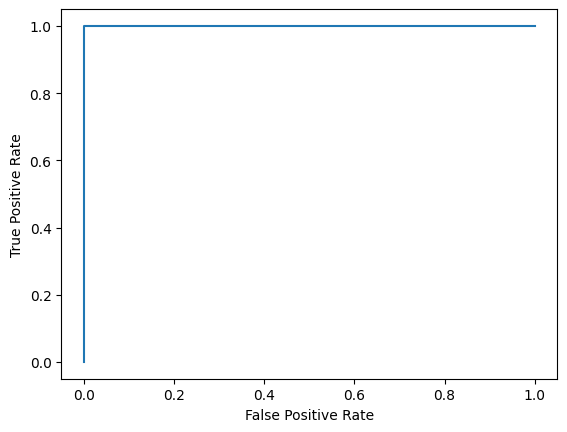

In [32]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()